In [1]:
import warnings
# 忽略警告訊息
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.model_selection import train_test_split

X = df
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=0))

size = np.linspace(.1, 1.0, 10)
train_sizes, train_scores, valid_scores = \
    learning_curve(estimator=pipe_lr,
                   X=X_train, y=y_train,
                   train_sizes=size,
                   cv=10, n_jobs=-1)
train_scores[:3, :]

array([[1.        , 1.        , 0.975     , 0.975     , 0.975     ,
        0.975     , 0.975     , 0.975     , 0.975     , 0.975     ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99180328, 0.99180328, 0.99180328, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [4]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
valid_scores_mean[:3]

array([0.92318841, 0.96487923, 0.96710145])

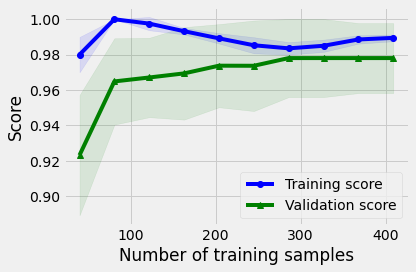

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores_mean, 
         color='blue', marker='o', 
         label='Training score')
plt.fill_between(train_sizes, 
                 train_scores_mean+train_scores_std, 
                 train_scores_mean-train_scores_std, 
                 color='blue', alpha=.1)
plt.plot(train_sizes, valid_scores_mean, 
         color='green', marker='^', 
         label='Validation score')
plt.fill_between(train_sizes, 
                 valid_scores_mean+valid_scores_std, 
                 valid_scores_mean-valid_scores_std, 
                 color='green', alpha=.1)
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()

In [6]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-4, 4, 9)
train_scores, valid_scores = validation_curve(LogisticRegression(), 
                                              X, y, param_name="C", 
                                              param_range=param_range, 
                                              cv=10, scoring="accuracy", 
                                              n_jobs=-1)
train_scores[:3, :]

array([[0.93164062, 0.93359375, 0.93164062, 0.92773438, 0.92578125,
        0.93554688, 0.92578125, 0.9296875 , 0.9375    , 0.92787524],
       [0.93945312, 0.94726562, 0.9375    , 0.94335938, 0.94140625,
        0.94726562, 0.94335938, 0.94726562, 0.93554688, 0.94346979],
       [0.9375    , 0.9375    , 0.93945312, 0.93554688, 0.93554688,
        0.93554688, 0.93359375, 0.94140625, 0.93945312, 0.92982456]])

In [7]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
valid_scores_mean[:3]

array([0.92800752, 0.93677945, 0.92979323])

Text(0, 0.5, 'Score')

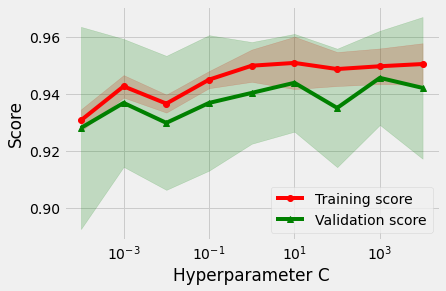

In [8]:
plt.semilogx(param_range, train_scores_mean, 
             label="Training score", color="r", 
             marker='o')
plt.fill_between(param_range, 
                 train_scores_mean-train_scores_std,
                 train_scores_mean+train_scores_std, 
                 alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, 
             label="Validation score", color="g", 
             marker='^')
plt.fill_between(param_range, 
                 valid_scores_mean-valid_scores_std,
                 valid_scores_mean+valid_scores_std, 
                 alpha=0.2, color="g")
plt.legend(loc='lower right')
plt.xlabel('Hyperparameter C')
plt.ylabel('Score')

In [9]:
from sklearn.metrics import classification_report

# 取出 300 個訓練樣本即可
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=300, random_state=0)

logit = LogisticRegression(C=10)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
print('LogisticRegression 分類錯誤的樣本數： %d' % (y_test != y_pred).sum())
print(classification_report(y_pred, y_test))

LogisticRegression 分類錯誤的樣本數： 16
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       103
           1       0.94      0.96      0.95       166

    accuracy                           0.94       269
   macro avg       0.94      0.93      0.94       269
weighted avg       0.94      0.94      0.94       269

